# EDA del archivo resumen internet acceso por velocidad (no se usa para analisis final)

In [10]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [11]:
#importo 
ruta_al_archivo = '../DATA/10-Internet_Accesos-por-velocidad.csv'
df = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [12]:
#observo resultado
df.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31.981,85.668,1.075.272,1.109.421,765.015,335.573,7.410.902,394.282,11.208.114
1,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
2,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
3,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
4,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      36 non-null     int64  
 1   Trimestre                36 non-null     int64  
 2   Hasta 512 kbps           36 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   36 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  36 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  36 non-null     object 
 8   Más de 30 Mbps           36 non-null     object 
 9   OTROS                    36 non-null     float64
 10  Total                    36 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.2+ KB


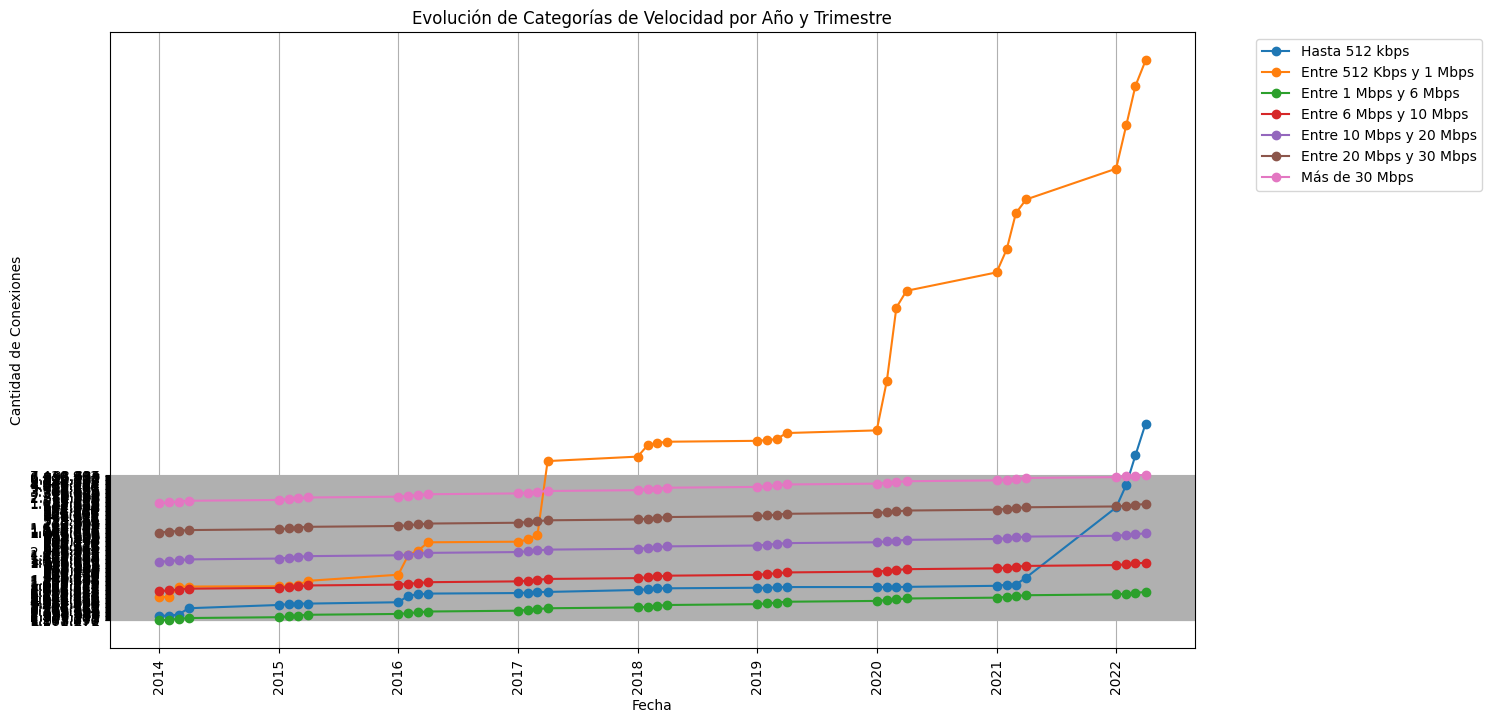

In [14]:

# Crear una nueva columna 'Fecha' combinando 'Año' y 'Trimestre'
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + ' Q' + df['Trimestre'].astype(str), format='%Y Q%m')

# Seleccionar las columnas relevantes para la graficación
df_subset = df[['Fecha', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']]

# Ordenar el DataFrame por 'Fecha' de menor a mayor
df_subset = df_subset.sort_values(by='Fecha')

# Graficar la evolución en el tiempo
plt.figure(figsize=(14, 8))
for columna in df_subset.columns[1:]:
    plt.plot(df_subset['Fecha'], df_subset[columna].sort_values(), label=columna, marker='o')

plt.title('Evolución de Categorías de Velocidad por Año y Trimestre')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Conexiones')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


Todas las velocidades se incrementan, con las menores velocidades creciendo mas rapidamente


# EDA del archivo internet acceso por velocidad

In [15]:
#importo 
ruta_al_archivo = '../DATA/11-Internet_Accesos-por-velocidad.csv'
df1 = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [16]:
#observo resultado
df1.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    object 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    object 
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 81.1+ KB


## Exporto csv para usar en power bi

In [21]:
import os

ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Analitics\DATA PowerBi'
nombre_archivo = 'Acceso por velocidad_resumen.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df.to_csv(ruta_completa, index=False)

In [22]:
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Analitics\DATA PowerBi'
nombre_archivo = 'Acceso por velocidad.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df1.to_csv(ruta_completa, index=False)